Medical Cost Personal Datasets- used data set, Tareget variable is - 'Charges'
We have to build a regression model to predict the target variable

Data Preprocessing
Dataset link - https://www.kaggle.com/datasets/mirichoi0218/insurance/

In [1]:
#importing the libraries and dataset
import numpy as np #arrays
import pandas as pd #dataframe
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns

In [2]:
dataset=pd.read_csv('insurance.csv') #importing dataset

# Data Exploration

In [3]:
dataset.head()
#to understand the dataset contents

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape
# 1338 observations and 7 columns

(1338, 7)

In [5]:
dataset.info()
# to get more info about the data distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#to check columns with cathegorical values
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [11]:
#statistical summary about the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


25%, 50%, 75% are the 1st, 2nd and 3rd quartiles 

Group the data by sex, smoker and region

In [13]:

dataset.groupby('sex').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_29712\2583341562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [14]:
dataset.groupby('smoker').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_29712\3450466906.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


Above we see for smokers and non smokers there is a huge difference in charges.

In [15]:
dataset.groupby('region').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_29712\2418984855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Above we observe for southeast the charges are slightly higher and for rest are same.

# Dealing with missing values

In [16]:
dataset.isnull().values.any()
#checking if it has any null values

False

In [17]:
dataset.isnull().values.sum()

0

# Encoding the categorical data

In [18]:
dataset.select_dtypes(include='object').columns
#to check the columns with categorical columns

Index(['sex', 'smoker', 'region'], dtype='object')

Below we check the categorical values each category is taking 

In [20]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [21]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
#One hot encoding
dataset=pd.get_dummies(data=dataset, drop_first=True) #drops the first column after encoding, this is to avoid overfitting

In [24]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [26]:
dataset.shape

(1338, 9)

# Correlation Matrix

In [27]:
dataset_2=dataset.drop(columns='charges')
# we are dropping the charges column as it's the target variable

<Axes: title={'center': 'correlation with charges'}>

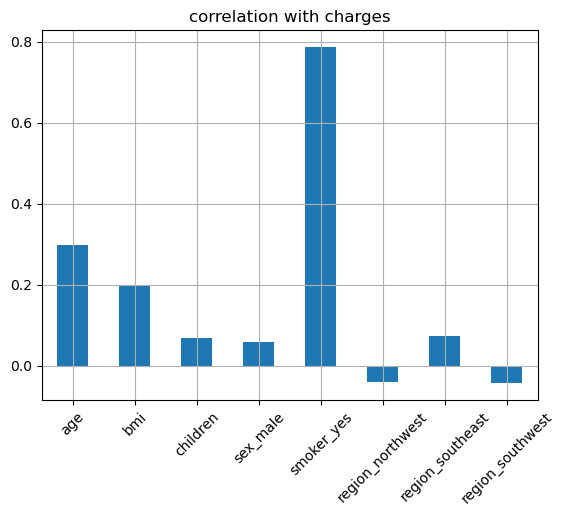

In [35]:
dataset_2.corrwith(dataset['charges']).plot.bar(title='correlation with charges', rot=45, grid=True)
#seeing the correlation of columns with charges

In [36]:
corr=dataset.corr()

<Axes: >

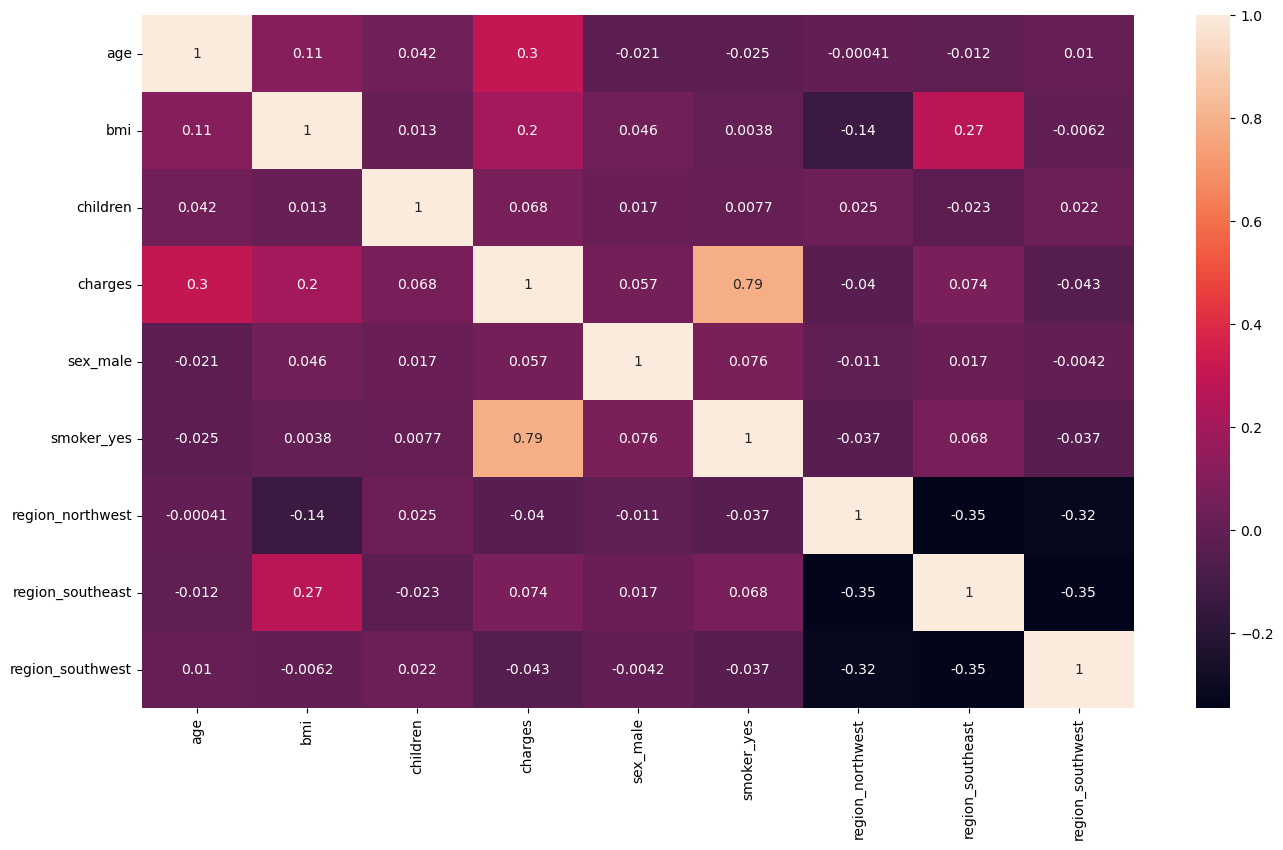

In [43]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

# Splitting the dataset

In [44]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [45]:
# matrix of features / independent variable
x=dataset.drop(columns='charges')

In [48]:
# target / dependent variable
y=dataset['charges']

In [49]:
# now we do train-test-split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [50]:
x_train.shape

(1070, 8)

In [51]:
x_test.shape

(268, 8)

In [52]:
y_test.shape

(268,)

In [53]:
y_train.shape

(1070,)

# Feature scaling

In [55]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # instance of the class
#feature scaling and feature transform
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [56]:
x_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [57]:
x_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

Data preprocessing is finally done, lets now proceed to the next section.

# Building the model

In [59]:
#Multiple linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
regressor_lr= LinearRegression() #instance of the class
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [60]:
# Now do the predictions
y_pred=regressor_lr.predict(x_test)

In [61]:
#now analysing the performance
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,y_pred)

0.7835929767120723

Random forest regression

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf= RandomForestRegressor() #instance of the class
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
# Now do the predictions
y_pred=regressor_rf.predict(x_test)

In [68]:
r2_score(y_test,y_pred)

0.864724111045816

# Predict charges for a new customer

Name: Aman, age: 40; sex:1; bmi: 45.50, children:4 , smoker:1 , region: northeast

In [71]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [72]:
aman_obs=[[40,45.5,4,1,1,0,0,0]]

In [73]:
regressor_rf.predict(sc.transform(aman_obs))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44031.8893145])

In [76]:
regressor_lr.predict(sc.transform(aman_obs))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39019.17259481])

This is the end of the problem, we here predicted the charge for a single person too.